In [2]:
# 패키지 및 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [3]:
# 데이터 가져오기

df = pd.read_csv("./SAMPLE.csv", encoding = "cp949")

In [4]:
# 쓸모없는 열 삭제하기

df.drop(['NUMBER', 'name', 'phone_num', 'email',
        'Unnamed: 12','Unnamed: 13'], axis = 1, inplace = True)

num_rows = df.shape[0]
df.drop(num_rows - 1, axis=0, inplace=True)
df

,gender,age,address,funnel,cart_date,buy_yn,buy_date,Goods
0,F,31.0,강원도 홍천군,Direct,2022-08-22,Y,2022-08-30,bike
1,M,48.0,충청남도 공주시,Direct,2022-05-09,Y,2022-05-15,T-shirt
2,M,41.0,강원도 인제군,Paid,2022-08-09,Y,2022-09-26,bottle
3,M,40.0,강원도 철원군,Paid,2022-01-06,Y,2022-11-11,bike
4,M,22.0,경기도 동두천시,Paid,2022-11-18,Y,2022-12-20,bottle
...,...,...,...,...,...,...,...,...
995,F,64.0,충청남도 공주시,Cross,2022-02-16,Y,2022-09-16,T-shirt
996,M,48.0,부산광역시,Direct,2022-12-28,Y,2022-12-29,pen
997,M,37.0,경상남도 창녕군,Cross,2022-10-08,Y,2022-10-14,pen
998,M,22.0,전라북도 익산시,Cross,2022-02-09,Y,2022-07-19,T-shirt


In [5]:
# 구매한 행은 1, 구매하지 않은 행은 0으로 지정한 새로운 열 생성

df['buy_event'] = (df['buy_yn'] == 'Y').astype(int)
df.drop(['buy_yn'], axis=1, inplace=True)

In [6]:
df.shape

(1000, 8)

In [7]:
# 날짜 형식으로 변환 후 None값은 0으로 대체

df['buy_date'] = pd.to_datetime(df['buy_date'], errors='coerce')
df['cart_date'] = pd.to_datetime(df['cart_date'], errors='coerce')
df['date_diff'] = (df['buy_date'] - df['cart_date']).dt.days
df['date_diff'] = df['date_diff'].fillna(0).astype(int)

In [16]:
# LabelEncoder를 사용하여 'gender' 열의 범주형 데이터를 숫자로 변환

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

In [17]:
# 'date_diff'와 'age' 열을 선택
X_num = df[['date_diff', 'age']]

# StandardScaler를 초기화하고 데이터를 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# 표준화된 데이터로 DataFrame을 업데이트
df[['date_diff', 'age']] = X_scaled

In [10]:
# 'funnel' 열의 값을 숫자로 매핑하는 딕셔너리 생성
funnel_mapping = {'Direct': 1, 'Cross': 2, 'Paid': 3, 'Organic': 4}

# 'funnel_num' 열 생성
df['funnel_num'] = df['funnel'].map(funnel_mapping)

# 'funnel' 열 삭제
df.drop(['funnel'], axis=1, inplace=True)

# 결과 확인
df

,gender,age,address,cart_date,buy_date,Goods,buy_event,date_diff,funnel_num
0,F,31.0,강원도 홍천군,2022-08-22,2022-08-30,bike,1,8,1
1,M,48.0,충청남도 공주시,2022-05-09,2022-05-15,T-shirt,1,6,1
2,M,41.0,강원도 인제군,2022-08-09,2022-09-26,bottle,1,48,3
3,M,40.0,강원도 철원군,2022-01-06,2022-11-11,bike,1,309,3
4,M,22.0,경기도 동두천시,2022-11-18,2022-12-20,bottle,1,32,3
...,...,...,...,...,...,...,...,...,...
995,F,64.0,충청남도 공주시,2022-02-16,2022-09-16,T-shirt,1,212,2
996,M,48.0,부산광역시,2022-12-28,2022-12-29,pen,1,1,1
997,M,37.0,경상남도 창녕군,2022-10-08,2022-10-14,pen,1,6,2
998,M,22.0,전라북도 익산시,2022-02-09,2022-07-19,T-shirt,1,160,2


In [11]:
# 'goods' 열의 값을 숫자로 매핑하는 딕셔너리 생성
goods_mapping = {'bike': 1, 'bottle': 2, 'notebook': 3,
                 'pen': 4, 'sticker': 5, 'T-shirt': 6}

# 'goods_num' 열 생성
df['goods_num'] = df['Goods'].map(goods_mapping)

# 'Goods' 열 삭제
df.drop(['Goods'], axis=1, inplace=True)

# 결과 확인
df

,gender,age,address,cart_date,buy_date,buy_event,date_diff,funnel_num,goods_num
0,F,31.0,강원도 홍천군,2022-08-22,2022-08-30,1,8,1,1.0
1,M,48.0,충청남도 공주시,2022-05-09,2022-05-15,1,6,1,6.0
2,M,41.0,강원도 인제군,2022-08-09,2022-09-26,1,48,3,2.0
3,M,40.0,강원도 철원군,2022-01-06,2022-11-11,1,309,3,1.0
4,M,22.0,경기도 동두천시,2022-11-18,2022-12-20,1,32,3,2.0
...,...,...,...,...,...,...,...,...,...
995,F,64.0,충청남도 공주시,2022-02-16,2022-09-16,1,212,2,6.0
996,M,48.0,부산광역시,2022-12-28,2022-12-29,1,1,1,4.0
997,M,37.0,경상남도 창녕군,2022-10-08,2022-10-14,1,6,2,4.0
998,M,22.0,전라북도 익산시,2022-02-09,2022-07-19,1,160,2,6.0


In [18]:
X_num = df[['date_diff', 'age', 'gender']]
X_cat = df[['funnel_num','goods_num']]
y = df['buy_event']

In [20]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [22]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [23]:
model_xgb.feature_importances_

array([0.05431299, 0.        , 0.        , 0.        , 0.945687  ],
      dtype=float32)

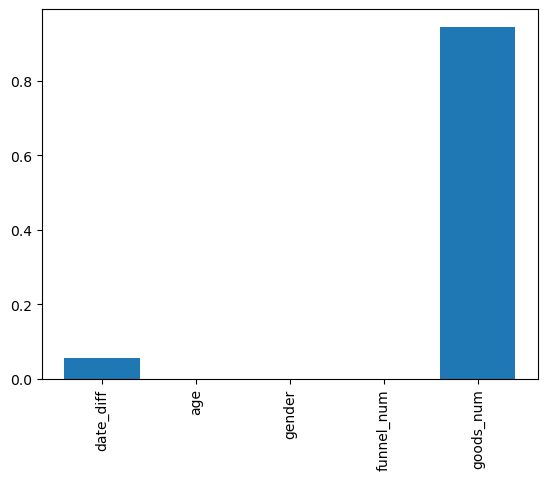

In [24]:
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation = 90)
plt.show()